In [266]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import re

## Scrapping the first page

In [143]:
#launch url
url = "https://www.leboncoin.fr//ventes_immobilieres/offres/ile_de_france"
#driver = webdriver.Firefox(executable_path = 'D:\Selenium_RiponAlWasim\geckodriver-v0.18.0-win64\geckodriver.exe')
# create a new Firefox session
driver = webdriver.Firefox()
driver.implicitly_wait(10)
driver.get(url)

annonces=[]

In [ ]:
element_title = driver.find_elements_by_class_name('item_title')
element_price = driver.find_elements_by_class_name('item_price')
for i,(title,price) in enumerate(zip(element_title,element_price)):
    print("Annonce : ",i," ",title.text, " ",price.text)

In [145]:
elements = driver.find_elements_by_xpath("//a[@class='list_item clearfix trackable']")
for i, elt in enumerate(elements):
    if(i<35):
        print("Annonce : ",i)
        print(elt.get_attribute('href'))  
        print(elt.text)
elements[0].text.replace('\n(pro)','').split('\n')

# Scrapping the following pages

### Note : The HTM tags are not the same as in the first page.

In [30]:
annonces=[]
for i in range(44,60):
    url = "https://www.leboncoin.fr/ventes_immobilieres/offres/ile_de_france/p-"+str(i)+"/"
    driver = webdriver.Firefox()
    driver.implicitly_wait(30)
    driver.get(url)
    elements = driver.find_elements_by_xpath("//a[@class='clearfix trackable']")
    for j, elt in enumerate(elements):
        if(j<35):
            #print("Annonce : ",j)
            #print(elt.get_attribute('href'))  
            #print(elt.text)
            #annonces.append([elt.text.replace('\n(pro)','').split('\n'),elt.get_attribute('href')])
            try :
                url_annonce = elt.get_attribute('href')
                driver_annonce = webdriver.Firefox()
                driver_annonce.implicitly_wait(10)
                driver_annonce.get(url_annonce)


                #elements = driver.find_elements_by_xpath("//div[@class='_3Jxf3']")
                elements_annonce = driver_annonce.find_elements_by_xpath("//div[@class='_277XW']")
                elements_descr = driver_annonce.find_elements_by_xpath("//span[@class='_2wB1z']")
                for (elt_annonce,elt_descr) in zip(elements_annonce,elements_descr):
                    #print(elt.text)
                    #print(descr.text)
                    annonces.append([(i-1)*(j+1),elt.text.replace('\n(pro)','').split('\n'),
                                         elt.get_attribute('href'),
                                         elt_annonce.text.split('\n'),
                                         elt_descr.text])
                driver_annonce.quit()
            except :
                pass
    print(url)
    driver.quit()

https://www.leboncoin.fr/ventes_immobilieres/offres/ile_de_france/p-3/
https://www.leboncoin.fr/ventes_immobilieres/offres/ile_de_france/p-4/
https://www.leboncoin.fr/ventes_immobilieres/offres/ile_de_france/p-5/
https://www.leboncoin.fr/ventes_immobilieres/offres/ile_de_france/p-6/
https://www.leboncoin.fr/ventes_immobilieres/offres/ile_de_france/p-7/
https://www.leboncoin.fr/ventes_immobilieres/offres/ile_de_france/p-8/
https://www.leboncoin.fr/ventes_immobilieres/offres/ile_de_france/p-9/
https://www.leboncoin.fr/ventes_immobilieres/offres/ile_de_france/p-10/
https://www.leboncoin.fr/ventes_immobilieres/offres/ile_de_france/p-11/
https://www.leboncoin.fr/ventes_immobilieres/offres/ile_de_france/p-12/
https://www.leboncoin.fr/ventes_immobilieres/offres/ile_de_france/p-13/
https://www.leboncoin.fr/ventes_immobilieres/offres/ile_de_france/p-14/
https://www.leboncoin.fr/ventes_immobilieres/offres/ile_de_france/p-15/
https://www.leboncoin.fr/ventes_immobilieres/offres/ile_de_france/p-16/

In [237]:
# to keep the original list
annonces_44=annonces

In [436]:
# example of the retrieved data
annonces_44[306]

[270,
 ['5 Pièces traversant coeur de ville Ventes immobilières',
  'Sèvres 92310',
  '715 000 €',
  'Hier, 17:16'],
 'https://www.leboncoin.fr/ventes_immobilieres/1509883101.htm/',
 ['HONORAIRES',
  'Oui',
  'TYPE DE BIEN',
  'Appartement',
  'PIÈCES',
  '5',
  'SURFACE',
  '114 m²',
  'RÉFÉRENCE',
  'tra050',
  'GES',
  'A',
  'B',
  'C',
  'D',
  'E',
  'F',
  'G',
  'CLASSE ÉNERGIE',
  'A',
  'B',
  'C',
  'D',
  'E',
  'F',
  'G'],
 'Exclusivité LM Immobilier Nicolas Le Marcis – En cœur de ville, proche toutes commodités à pied. Dans une résidence de 88 de bon standing, très bel appartement de 5 pièces traversant, composé d’une entrée avec placards, un double séjour avec balcon exposé au sud/ouest et avec la possibilité de fermer la partie salle à manger pour créer une quatrième chambre, une cuisine aménagée, une suite parentale (placards/dressing, salle d’eau avec wc, chambre), un couloir avec placards, une chambre avec accès à un balcon exposé au nord/est, une autre chambre expo

## Code to scrape a particular ad

In [ ]:
url = 'url goes here'
driver = webdriver.Firefox()
driver.implicitly_wait(10)
driver.get(url)


#elements = driver.find_elements_by_xpath("//div[@class='_3Jxf3']")
elements = driver.find_elements_by_xpath("//div[@class='_277XW']")

elements_descr = driver.find_elements_by_xpath("//span[@class='_2wB1z']")
for j, (elt,descr) in enumerate(zip(elements,elements_descr)):
    print(elt.text)
    print(descr.text)
    annonces_details=[elt, descr.text]
driver.quit()

## Saving the scrapped data

In [246]:
annonces_44[i][1]

['Appartement studio 26 m²', 'Lieusaint 77127', '100 000 €', 'Hier, 11:33']

In [248]:
#nb_photos=[]
titre_annonce=[]
nom_commune=[]
code_postal_commune=[]
code_postal_departement=[]
prix=[]
date=[]
lien=[]
details_annonce=[]
description=[]

for i in range(len(annonces_44)):
    #to delete the tag 'Ventes immo'
    try:
        if(annonces_44[i][1][2]=='Ventes immobilières'):
            del annonces_44[i][1][2]
        #To delete the number of photos from the ad
        try :
            if(isinstance(int(annonces_44[i][1][0]), int)==True):
                del annonces_44[i][1][0]
        except:
            pass 
        #nb_photos.append(annonces_44[i][1][0])
        titre_annonce.append(annonces_44[i][1][0])
        nom_commune.append(annonces_44[i][1][1][:-5])
        code_postal_commune.append(annonces_44[i][1][1][-5:])
        code_postal_departement.append(annonces_44[i][1][1][-5:-3])
        prix.append(annonces_44[i][1][2])
        date.append(annonces_44[i][1][3])
        lien.append(annonces_44[i][2])
        details_annonce.append(annonces_44[i][3])
        description.append(annonces_44[i][4])
        
    except :
        print(i)
        pass

100
678
884
943
947


## Put the data into a pandas dataframe

In [199]:
df = pd.DataFrame()

df['nb_photos'] = pd.Series(nb_photos)
df['titre_annonce'] = pd.Series(titre_annonce)
df['commune'] = pd.Series(nom_commune)
df['code_postal_commune'] = pd.Series(code_postal_commune)
df['code_postal_departement'] = pd.Series(code_postal_departement)
df['prix'] = pd.Series(prix)
df['date'] = pd.Series(date)
df['lien'] = pd.Series(lien)
df['details_annonce'] = pd.Series(details_annonce)
df['description'] = pd.Series(description)

In [200]:
#to get the value of 'TYPE DE BIEN'
def funct_type_bien(x):
    try:
        for j in range(len(x)):
            if(x[j]=='TYPE DE BIEN'):
                return x[j+1]
    except:
        pass
    else:
        return ''
df['type_bien']=df['details_annonce'].apply(lambda x :funct_type_bien(x))

In [201]:
def funct_piece(x):
    try:
        for j in range(len(x)):
            if(x[j]=='PIÈCES'):
                return x[j+1]
    except:
        pass
    else:
        return ''
df['pieces']=df['details_annonce'].apply(lambda x :funct_piece(x))

In [202]:
def funct_surface(x):
    try:
        for j in range(len(x)):
            if(x[j]=='SURFACE'):
                return x[j+1]
    except:
        pass
    else:
        return ''
df['surface']=df['details_annonce'].apply(lambda x :funct_surface(x))

In [203]:
writer = pd.ExcelWriter('annonces_leboncoin_1.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='Feuil1')
writer.save()

# Analyzing the data

In [408]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 8

In [409]:
data=pd.read_excel('annonces_leboncoin_1.xlsx',sheet_name='Final_data')

## Creating new fields

In [425]:
data['prix_surface']=data['prix']/data['surface_int']

def categories_surface(x):
    if(x<30):
        return '1. [0-30m²['
    if(x>=30 and x<50):
        return '2. [30m²-50m²['
    if(x>=50 and x<80):
        return '3. [50m²-80m²['
    if(x>80 and x<=100):
        return '4. [80m²-100m²['
    if(x>100 and x<=150):
        return '5. [10m²-150m²['
    if(x>150 and x<=200):
        return '6. [150m²-200m²['
    if(x>200):
        return '7. [200m²-INF['
    
data['surface_categorie']=data['surface_int'].apply(lambda x : categories_surface(x))

# Exploratory data analysis

## Distribution of house surface

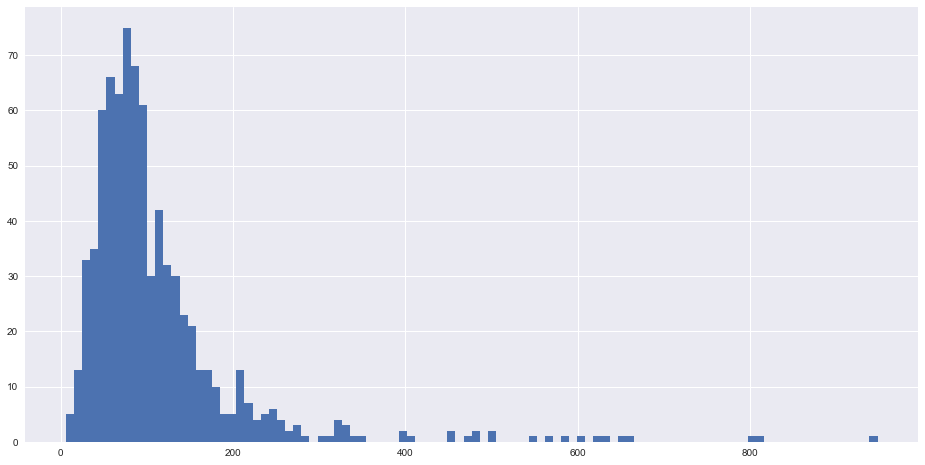

In [468]:
plt.hist(np.array(data['surface_int'].dropna()).astype(np.float),bins=100)
plt.savefig('distribution_house_surface.png')

## Scatter plot of square meter price by house's surface 

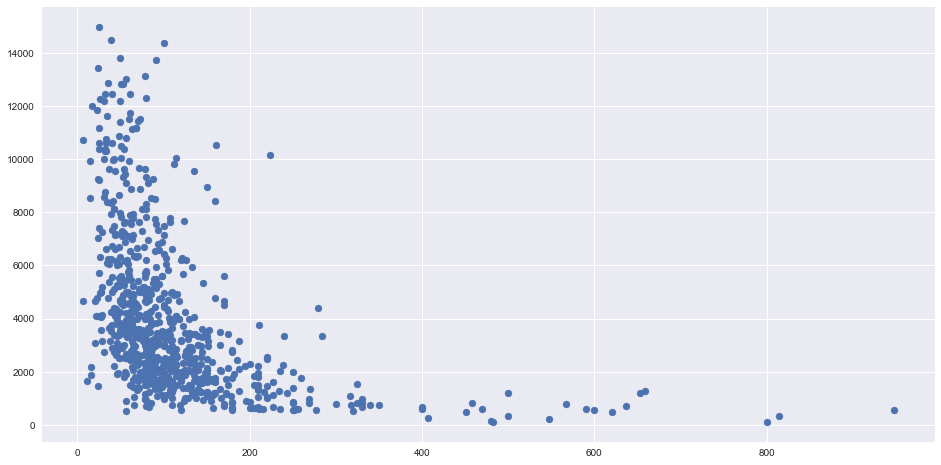

In [469]:
plt.scatter(data['surface_int'],data['prix_surface'])
plt.savefig('square_meter_price_by_surface.png')

## Heatmap of Square meter price by house type and location

In [437]:
import seaborn as sns; sns.set()

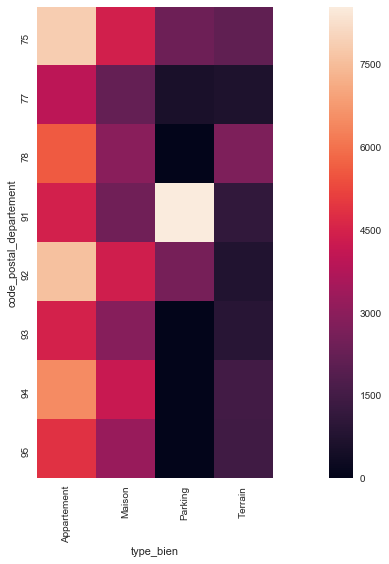

type_bien                Appartement       Maison      Parking      Terrain
code_postal_departement                                                    
75                       7840.105924  4401.329470  2385.891865  2106.912386
77                       3935.886794  2221.046585   584.313725   678.217831
78                       5571.922757  2952.176405     0.000000  2709.754285
91                       4465.725125  2436.416518  8533.333333  1133.053799
92                       7596.996655  4369.414626  2587.121212   757.142857
93                       4497.289595  2896.771168     0.000000   915.693205
94                       6470.596162  4223.036427     0.000000  1489.116203
95                       4836.902630  3265.500938     0.000000  1450.420947


In [450]:
# create pivot table, days will be columns, hours will be rows
piv = pd.pivot_table(data[data['type_bien'].isin(['Maison','Appartement','Terrain','Parking'])], values="prix_surface",index=["code_postal_departement"], columns=["type_bien"], fill_value=0)
#plot pivot table as heatmap using seaborn
ax = sns.heatmap(piv, square=True)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
plt.tight_layout()
plt.show()
print(piv)

## Heatmap of Square meter price by house surface ('Maison' and 'Appartement' )and location


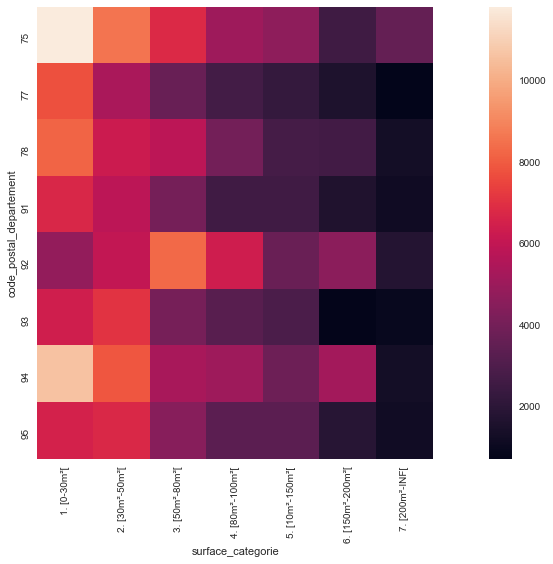

In [467]:
# create pivot table, days will be columns, hours will be rows
piv = pd.pivot_table(data[data['type_bien'].isin(['Maison','Appartement','Terrain'])], values="prix_surface",index=["code_postal_departement"], columns=["surface_categorie"], fill_value=0)
#plot pivot table as heatmap using seaborn
ax = sns.heatmap(piv, square=True)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90 )
plt.tight_layout()
plt.savefig('Leboncoin_HeatMap_Deprt_surface.png')

In [442]:
piv

surface_categorie,1. [0-30m²[,2. [30m²-50m²[,3. [50m²-80m²[,4. [80m²-100m²[,5. [10m²-150m²[,6. [150m²-200m²[,7. [200m²-INF[
code_postal_departement,,,,,,,
75,11805.379121,8557.090881,6774.104726,5077.775261,4682.532931,2546.403685,3595.946622
77,7748.497203,5371.873703,3660.257301,2666.114787,2249.681612,1609.054233,701.313724
78,8166.206897,6276.587547,5857.972894,3984.854180,2736.710429,2649.646291,1279.148580
91,6694.681481,5824.809665,4018.845291,2566.948656,2569.521867,1650.641735,1163.777814
92,4782.608696,6015.238990,8324.814877,6345.988990,3706.768128,4588.235294,1770.369347
93,6394.567597,7068.181818,4073.293142,3259.722873,2892.807591,773.529412,942.715490
94,10600.000000,7895.949569,5328.298725,5058.205871,3812.146826,5188.482475,1272.998987
95,6538.694639,6750.728371,4496.396161,3342.793743,3327.585323,1867.870164,1186.596020


## Modeling the square meter price by house surface

### Using a linear model

In [413]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [414]:
#reg_dataset=data[data['type_bien']==('Maison' or 'Appartement')][['prix_surface','surface_int']].dropna()
reg_dataset=data[['prix_surface','surface_int']].dropna()
reg_dataset.head()

,prix_surface,surface_int
0,3419.720588,136.0
1,6984.126984,63.0
2,5000.000000,56.0
3,5365.384615,52.0
4,141.666667,480.0


Coefficients: 
 [-12.33857039]
Mean squared error: 8018178.11
Variance score: 0.22


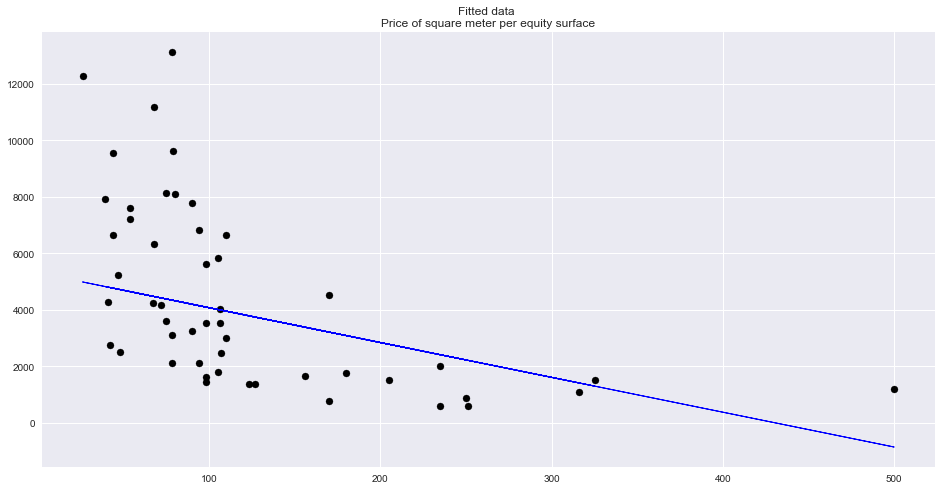

In [466]:
# Split the data into training/testing sets
surface_train = reg_dataset['surface_int'][:-50].values.reshape(-1,1)
surface_test = reg_dataset['surface_int'][-50:].values.reshape(-1,1)

# Split the targets into training/testing sets
prix_surface_train = reg_dataset['prix_surface'][:-50]
prix_surface_test = reg_dataset['prix_surface'][-50:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
#regr.fit(reg_dataset['surface'], reg_dataset['prix_surface'])
regr.fit(surface_train, prix_surface_train)

# Make predictions using the testing set
#prix_surface_predict = regr.predict(diabetes_X_test)
prix_surface_y_pred = regr.predict(surface_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(prix_surface_test, prix_surface_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(prix_surface_test, prix_surface_y_pred))

# Plot outputs
plt.scatter(surface_test, prix_surface_test,  color='black')
plt.plot(surface_test, prix_surface_y_pred, color='blue', linewidth=1)
plt.title('Fitted data \nPrice of square meter per equity surface')

plt.savefig('meter_square_price_linear.png')

### Using a 4th degree polynome

Polynome coefficients : [ 1.83332392e-07 -3.72941760e-04  2.59179456e-01 -7.43496461e+01
  8.75753459e+03]


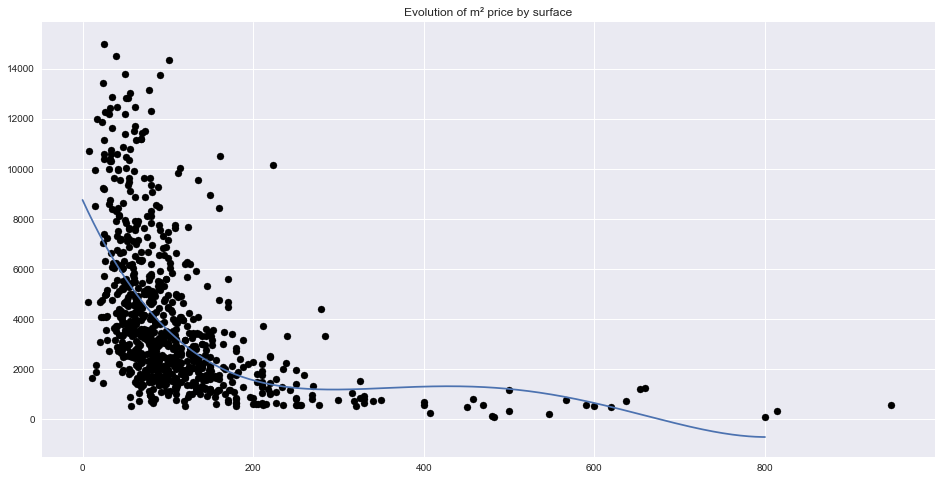

In [462]:
polynome=np.polyfit(reg_dataset['surface_int'], 
                    reg_dataset['prix_surface'], deg=4)

p= np.poly1d(polynome)
plt.plot(np.linspace(0, 800, 500),p(np.linspace(0, 800, 500)))
plt.scatter(reg_dataset['surface_int'], reg_dataset['prix_surface'],  color='black')
print('Polynome coefficients :', p.c)
plt.title('Evolution of m² price by surface')
plt.savefig('meter_square_price_4dg.png')